## **Visualizing K-Means Clusters**


## Step 1: Import the Required Libraries and Load the Dataset

- Import pandas and read the Pokemon
- Filter the data set to include only Grass, Fire, and Water types

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv('/Users/bassel_instructor/Documents/datasets/pokemon.csv'
                 , encoding='unicode_escape' # optional for systems that have unicode issues for this data
                 )
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


__Observation:__
- Here, we can see the output, which contains categorical variables.

In [35]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [36]:
# get data for 3 types only
type1_mask = df['Type 1'].isin(['Grass', 'Fire', 'Water'])

#remove unneeded columns - we want the clustering algo to classify the data based on numerical measure only
drop_cols = ['#', 'Type 1', 'Type 2', 'Generation', 'Legendary']

In [37]:
df_org = df.copy() #preserve the original df

In [38]:
# apply filter and drop cols
df = df[type1_mask].drop(columns=drop_cols, axis=1)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


__Observation:__ 
- We can see that the categorical variable has been dropped.

## Step 2: Create a K-Means Cluster

- Import K-Means from sklearn.cluster
- Fit the data set to the Attack and Defense columns and assign cluster labels
- Create a centroid so that we will know the exact centroid points for each cluster
- Add centroids and color information to the DataFrame


In [39]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
#define centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[112.27083333 102.47916667]
 [ 79.80188679  74.38679245]
 [ 49.875       48.075     ]]


In [41]:
#assign x and y coordinates of each centroid
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
print(cen_x)

[112.27083333333329, 79.80188679245283, 49.874999999999964]


In [42]:
#merge centroids coordinates with original dataset
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cen_x,cen_y
0,Bulbasaur,318,45,49,49,65,65,45,2,49.875000,48.075000
1,Ivysaur,405,60,62,63,80,80,60,2,49.875000,48.075000
2,Venusaur,525,80,82,83,100,100,80,1,79.801887,74.386792
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,0,112.270833,102.479167
4,Charmander,309,39,52,43,60,50,65,2,49.875000,48.075000


In [43]:
# use color pallets
colors = ['#DF2020', '#81DF20', '#2095DF']
df['Cluster_Color'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cen_x,cen_y,Cluster_Color
0,Bulbasaur,318,45,49,49,65,65,45,2,49.875000,48.075000,#2095DF
1,Ivysaur,405,60,62,63,80,80,60,2,49.875000,48.075000,#2095DF
2,Venusaur,525,80,82,83,100,100,80,1,79.801887,74.386792,#81DF20
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,0,112.270833,102.479167,#DF2020
4,Charmander,309,39,52,43,60,50,65,2,49.875000,48.075000,#2095DF


## Step 3: Create Scatter Plots

- Create a scatter plot with Attack and Defense as x and y axes
- Create a scatter plot with Attack and Defense as x and y axes and speed as size


Text(0, 0.5, 'Defense')

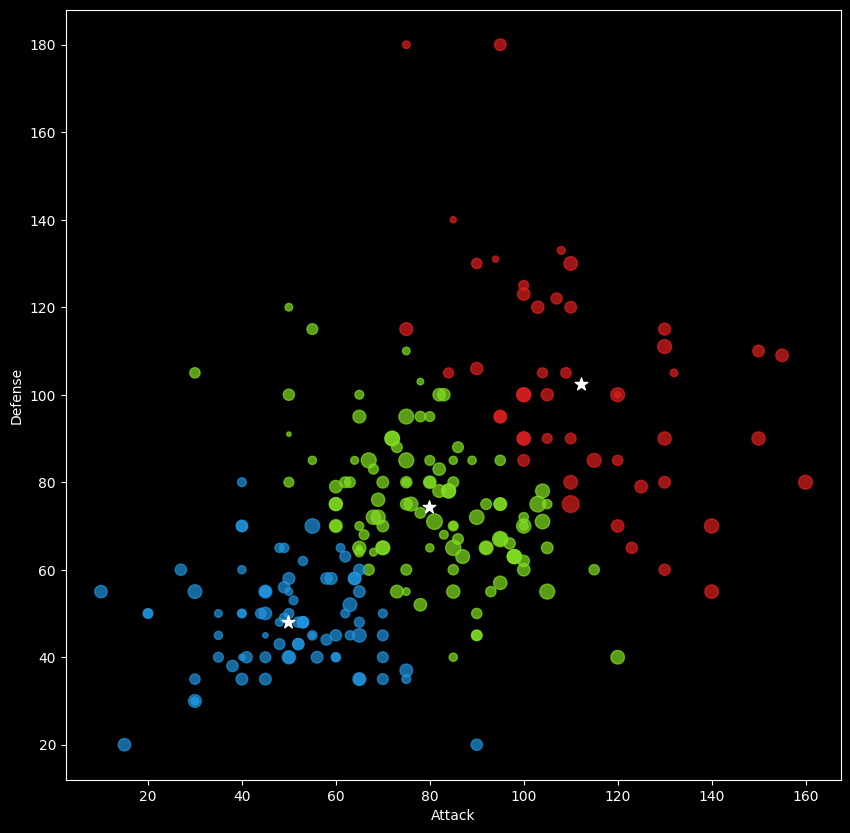

In [46]:
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
#add speed later for size
plt.scatter(df['Attack'], df['Defense'], c=df['Cluster_Color'], s=df['Speed'],alpha = 0.7) 
plt.scatter(cen_x, cen_y, marker='*', s=90, c='white')
plt.xlabel('Attack')
plt.ylabel('Defense')

__Observations:__
- Cluster output with K = 3
- We can see that there are three different clusters with three different colors.

> **Homework:** add the previously dropped col type1 ('Grass', 'Fire', 'Water') to the df and compare the outcome to the different clusters (0,1,2)

## Step 4: Create a Centroid Point for Each of the Cluster

- Create a scatter plot with centroids and lines connecting centroids to their respective points
- Add legends and labels


Text(0, 0.5, 'Defense')

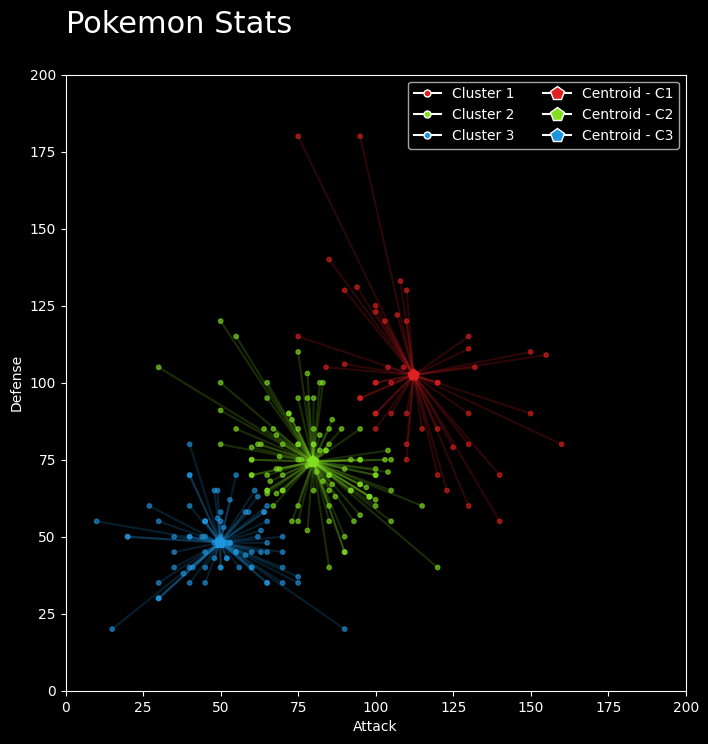

In [51]:
#adding lines
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, figsize=(8,8))

plt.scatter(df['Attack'], df['Defense'], c=df['Cluster_Color'], alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='p', c=colors, s=70)
for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x,]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val['Cluster_Color'], alpha=0.2)
cent_leg = [Line2D([0], [0], marker='p', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]    
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='p', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

__Observations:__
- We can see how the data is spread away from the centroid.
- We can see the cluster output with a centroid value and K = 3.
- This is how we can create the plot data for the cluster case.

In [52]:
df.columns

Index(['Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'cluster', 'cen_x', 'cen_y', 'Cluster_Color'],
      dtype='object')

#### Cluster Summary

In [54]:
df.groupby(['cluster'])[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed']].agg(['mean','max'])

HP           Attack          Defense         Sp. Atk       \
              mean  max        mean  max        mean  max       mean  max   
cluster                                                                     
0        83.395833  115  112.270833  160  102.479167  180  98.645833  180   
1        77.047170  170   79.801887  120   74.386792  120  85.367925  159   
2        53.062500  130   49.875000   90   48.075000   80  58.087500  110   

           Sp. Def           Speed       
              mean  max       mean  max  
cluster                                  
0        87.687500  160  72.729167  145  
1        74.698113  129  70.556604  127  
2        55.700000  140  57.800000  110


## Step 5: Create a Plot with a Convex Hull Enclosing Each Cluster

- Create a scatter plot with centroids and a convex hull enclosing each cluster
- Import convex hull from scipy.spatial
- Compute the convex hull for each cluster and plot the shape


(0.0, 200.0)

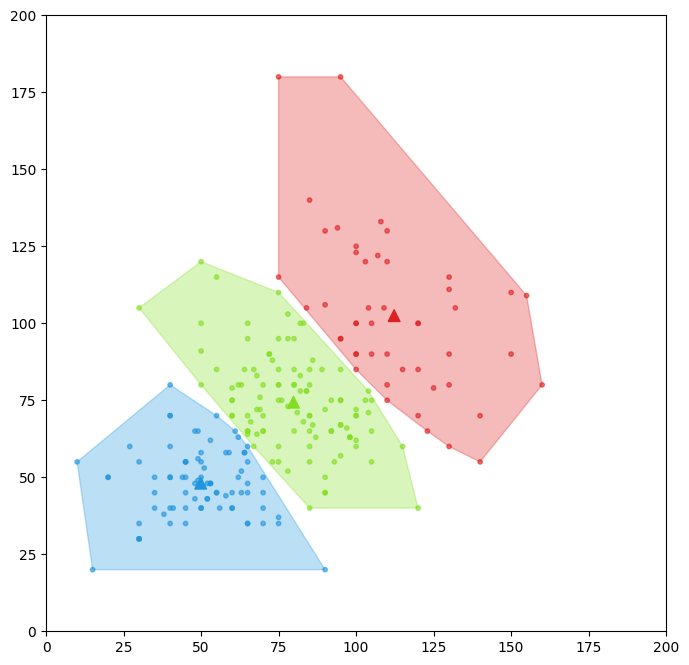

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)


__Observation:__
- Here, we can see the convex hull of the clusters.